**Before you do anything else, make a copy of this notebook.**

**Then, follow the instructions below to do the homework. Your final submission will just be a link to your copy of the notebook.**

## SETUP

Execute the code cells below and then proceed to the instructions.

In [ ]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

In [ ]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_val, y_val) = keras.datasets.california_housing.load_data(
    version="large", path="california_housing.npz", test_split=0.2, seed=113
)

## INSTRUCTIONS

### Dataset

Edited from https://keras.io/api/datasets/california_housing/

You have downloaded the California Housing dataset. This dataset was derived from the 1990 U.S. census, using one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

It's a regression dataset with 8 features. The target variable is the median house value in the census block group, in dollars.

The 8 input features are the following:

* MedInc: median income in block group
* HouseAge: median house age in block group
* AveRooms: average number of rooms per household
* AveBedrms: average number of bedrooms per household
* Population: block group population
* AveOccup: average number of household members
* Latitude: block group latitude
* Longitude: block group longitude


The 20,640 rows of data have been split into train and validation sets and stored in numpy arrays.
* `x_train`, `x_val`: numpy arrays containing the training and validation X matrices, respectively.

* `y_train`, `y_val`: numpy arrays containing the values of the dependent variable for the training and validation sets respectively. These are numbers typically between 25000 and 500000 and represent home prices in dollars.

### Assignment

To answer the questions below, feel free to use/re-use the code in the [Neural Heart Disease Prediction Model colab](https://colab.research.google.com/drive/1vfJMtyMg_9Dt8erei_I1M3ve9W98DdGU?usp=drive_link) that we covered in class.

First, standardize `x_train` and `x_val` using the mean and standard deviation of `x_train`. Then complete the following three parts.

Part I
* Define a Keras model with a single hidden layer of 16 neurons
* Use `model.compile` with `adam` as the optimizer and `mse` as the loss
* Train the Keras model for 100 epochs with `model.fit`, using a batch size of 32.
* Plot loss curves for the training and validation sets.
* Evaluate the model on the validation set and report the MSE.


Part II
* Take the Keras model you defined in Part I and add another hidden layer of 16 neurons. Then repeat the steps from Part I.

Part III
* Take the Keras model you defined in Part I. Modify it so that the input layer is ALSO connected (directly) to the output layer i.e., the output layer should be connected to the input layer *and* the hidden layer. Then repeat the steps from Part I.

Part IV

Using Keras Tuner, do hyperparameter optimization across:
- the number of layers: [1,2,3]
- the number of units in each layer: [4, 8]

(i.e., 6 hyper-parameter combinations)

Answer these questions in text cells:
* What is the optimal hyper-parameter combination?
* What is the MSE of the optimal model?
* How does this optimal model compare to the models found in Parts I, II and III?

**COMPLETE ALL THE ABOVE BY ADDING CODE AND TEXT CELLS TO THIS NOTEBOOK BELOW THIS CELL.**

First, standardize x_train and x_val using the mean and standard deviation of x_train. Then complete the following three parts.

NNs work best when the inputs are all roughly in the same range. So standard practice is to standardize the numeric variables.

OK, let's calculate the mean and standard deviation of every numeric variable in the training set.

In [ ]:
means = x_train.mean(axis=0)  # Compute mean per feature
std = x_train.std(axis=0)    # Compute std per feature

In [ ]:
means

array([-119.56227  ,   35.625397 ,   28.65413  , 2644.7268   ,
        539.5743   , 1433.2728   ,  501.45834  ,    3.8701892],
      dtype=float32)

In [ ]:
std

array([2.0011013e+00, 2.1297019e+00, 1.2597047e+01, 2.2100759e+03,
       4.2613458e+02, 1.1563269e+03, 3.8756674e+02, 1.8976454e+00],
      dtype=float32)

Let's standardize the train and validation arrays with
 these means and standard deviations.

In [ ]:
x_train= (x_train - means)/std

In [ ]:
x_val= (x_val - means)/std

In [ ]:
x_train

array([[ 0.64578164, -0.7209444 ,  1.8532811 , ..., -0.33318678,
        -0.02698463, -0.04505019],
       [ 0.60080445, -0.7819863 , -0.60761315, ..., -0.12736262,
         0.14330862, -0.6016874 ],
       [-1.413086  ,  1.0023006 ,  1.8532811 , ..., -0.623762  ,
        -0.2669433 ,  0.05375648],
       ...,
       [-1.3880982 ,  0.91308695,  1.8532811 , ..., -0.48193362,
        -0.36757112,  2.313188  ],
       [-1.3081443 ,  1.0633426 , -0.84576416, ...,  0.17359033,
         0.60000414,  2.2547474 ],
       [ 0.56582385, -0.66929364,  0.02745636, ...,  0.439951  ,
         0.4580931 , -0.3996475 ]], dtype=float32)

In [ ]:
x_val

array([[ 0.60080445, -0.7256391 ,  1.2975953 , ..., -0.14552358,
        -0.11987185, -0.25494185],
       [-0.31868744, -0.46738732, -1.163299  , ...,  0.04646365,
        -0.03472523,  0.30654347],
       [-0.8234106 ,  1.0257796 , -1.639601  , ..., -0.37556234,
        -0.51722276,  0.69708   ],
       ...,
       [-0.8633895 ,  1.1009073 ,  1.8532811 , ..., -0.03569305,
         0.00397778, -1.1017809 ],
       [ 0.6257922 , -0.7444215 ,  1.8532811 , ..., -0.41447866,
        -0.43207616, -0.6781505 ],
       [ 1.1654922 , -1.2984898 , -1.0045315 , ..., -0.6791097 ,
        -0.15083426, -0.43484896]], dtype=float32)

In [ ]:
#Check the shape of the data
print(f"x_train shape: {x_train.shape}")
print(f"x_val shape: {x_val.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")

x_train shape: (16512, 8)
x_val shape: (4128, 8)
y_train shape: (16512,)
y_val shape: (4128,)


In [ ]:
# Validate standardization
print("Mean after standardization (should be ~0):")
print(x_train.mean(axis=0))

print("\nStandard deviation after standardization (should be ~1):")
print(x_train.std(axis=0))

Mean after standardization (should be ~0):
[ 3.7187963e-06 -1.5139136e-05  9.6219743e-08 -4.3830487e-06
  7.0359974e-08 -4.2555124e-07 -2.6206983e-08  2.0552466e-06]

Standard deviation after standardization (should be ~1):
[1.0000081 1.0000014 0.9999902 1.0000006 0.9999982 1.0000005 0.9999968
 0.9999985]


In [ ]:
# Convert to pandas dataframe for analysis

# Feature names
feature_names = ["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "Latitude", "Longitude"]

# Convert training data to DataFrame
train_df = pd.DataFrame(x_train, columns=feature_names)
train_df['MedianHouseValue'] = y_train  # Add target column

# Convert validation data to DataFrame
val_df = pd.DataFrame(x_val, columns=feature_names)
val_df['MedianHouseValue'] = y_val

In [ ]:
#Check the shape of the data
train_df.shape

(16512, 9)

In [ ]:
#Check the shape of the data
val_df.shape

(4128, 9)

In [ ]:
# Display first few rows
print(train_df.head())
print(val_df.head())

     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  0.645782 -0.720944  1.853281  -0.143763    0.036199 -0.333187 -0.026985   
1  0.600804 -0.781986 -0.607613  -0.381311    0.038546 -0.127363  0.143309   
2 -1.413086  1.002301  1.853281  -0.347376   -0.264175 -0.623762 -0.266943   
3  0.805693 -0.800769 -1.401450   0.218216    0.390547  0.138998  0.496796   
4 -1.478049  1.077428 -0.369462  -1.006177   -1.116019 -1.098541 -1.100348   

   Longitude  MedianHouseValue  
0  -0.045050          252300.0  
1  -0.601687          146900.0  
2   0.053756          290900.0  
3   0.248946          141300.0  
4   5.645475          500001.0  
     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  0.600804 -0.725639  1.297595  -0.203489   -0.132762 -0.145524 -0.119872   
1 -0.318687 -0.467387 -1.163299   0.001029   -0.057668  0.046464 -0.034725   
2 -0.823411  1.025780 -1.639601  -0.344661   -0.566897 -0.375562 -0.517223   
3 -1.248176  1.044560

Part I

Define a Keras model with a single hidden layer of 16 neurons
Use model.compile with adam as the optimizer and mse as the loss
Train the Keras model for 100 epochs with model.fit, using a batch size of 32.
Plot loss curves for the training and validation sets.
Evaluate the model on the validation set and report the MSE.

From other sheet: At this point, the data is entirely numeric.

The easiest way to feed data to Keras is as Numpy arrays so we convert our two dataframes to Numpy arrays.

In [ ]:
train = train_df.to_numpy()
val = val_df.to_numpy()

Final step: Our features  𝑋  and dependent variable  𝑦  are both inside the train and test arrays so let's separate them out.

Note that the target column is our  𝑦  variable and it is column #8 from the left (counting from 0).

The np.delete function is perfect for selecting all columns except one.

In [ ]:
train_X = np.delete(train, 8, axis=1)
val_X = np.delete(val, 8, axis=1)

*Check* that it worked.

In [ ]:
train_X.shape, val_X.shape

((16512, 8), (4128, 8))

Next, select just the 8th column and define the train and test $y$ variables.

In [ ]:
train_y = train[:, 8]
val_y = val[:, 8]

In [ ]:
train_y.shape, val_y.shape

((16512,), (4128,))

## Build a model

Creating an NN is usually just a few lines of Keras code as we saw in class.

We will start with a single hidden layer.
Since this is a binary classification problem, we will use a sigmoid activation in the output layer.
The following model is what we created in class.

In [ ]:
# define the input layer
input = keras.layers.Input(shape=train_X.shape[1:])

# feed the input vector to the hidden layer
# optional: you can give names to each layer to help
# keep track. This doesn't affect the training etc.

h = keras.layers.Dense(16, activation="relu", name="Hidden")(input)

# feed the output of the hidden layer to the output layer
output = keras.layers.Dense(1)(h)

# tell Keras that this (input,output) pair is your model
model = keras.Model(input, output)

The `model.summary()` command is a good way to get a quick overview of what you have defined.

In [ ]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden (Dense)                       │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 161 (644.00 B)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 0 (0.00 B)

We can "visualize" the network graphically as well using Keras' `plot_model` function.

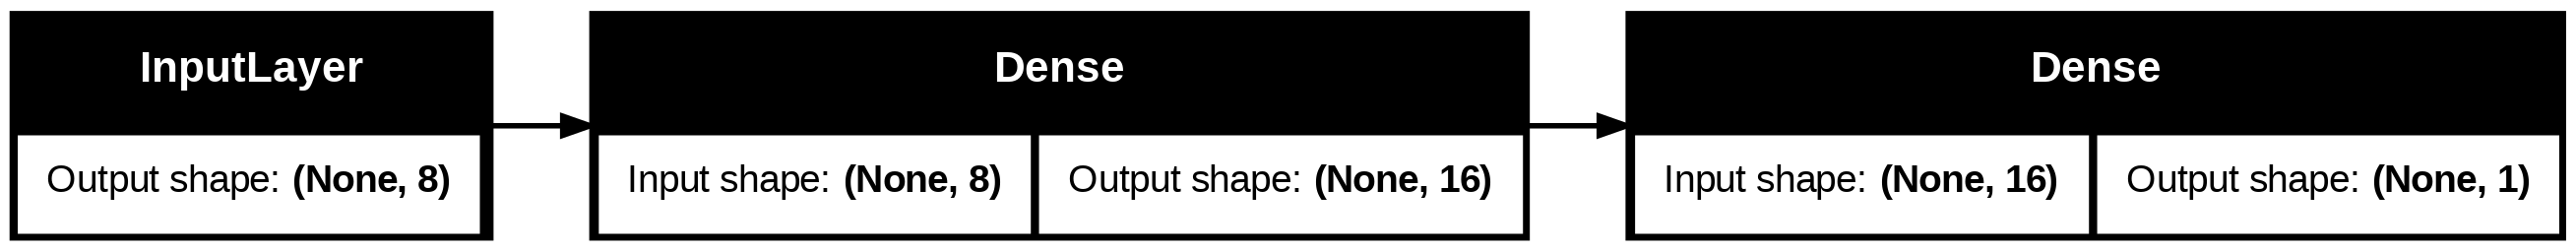

In [ ]:
keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

## Set optimization parameters

Now that the model is defined, we need to tell Keras three things:

What loss function to use - mse
Which optimizer to use - we will use a sibling of SGD called Adam which is an excellent default choice
What metrics you want Keras to report out - in classification problems like this one, Accuracy is usually the metric you want to see.
These three choices can be made using the model.fit function.

In [ ]:
model.compile(optimizer="adam",
              loss="mse",
              metrics=["mae"])
# or metrics=["acc"]

## Train the model

To kickoff training, we need to do three things:

Set the batch size. We referred to this as a minibatch in lecture but in keeping with convention, we will simply refer to it as batch from this point on. 32 is a good default for the batch size.
Set the number of epochs i.e., how many passes through the training data. Usually 20-30 epochs is a good starting point but since this dataset is very small, each epoch will be very quick so let's run it for 100 epochs. It will allow us to see if any overfitting happens
Pass in the training and validation datasets we created earlier.
OK, let's train the model using the model.fit function!

We will store the output of the training process in history. It will make it easy later to investigate what happened during training.

In [ ]:
history = model.fit(train_X,              # the array with the input X columns
                    train_y,              # the array with the output y column
                    epochs=100,           # number of epochs to run
                    batch_size=32,        # number of samples (ie data points) per batch
                    verbose=1,            # verbosity during training
                    validation_data=(val_X, val_y)) # validation data

Epoch 1/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 55951831040.0000 - mae: 206565.9062 - val_loss: 56177102848.0000 - val_mae: 207082.5469
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 56188518400.0000 - mae: 207264.7188 - val_loss: 56160628736.0000 - val_mae: 207046.5312
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 55795286016.0000 - mae: 206309.1250 - val_loss: 56131084288.0000 - val_mae: 206982.7500
Epoch 4/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 55827431424.0000 - mae: 206148.9531 - val_loss: 56091545600.0000 - val_mae: 206897.7656
Epoch 5/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 56101482496.0000 - mae: 206874.7031 - val_loss: 56043974656.0000 - val_mae: 206795.5312
Epoch 6/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 56185425920.0000 - mae: 206978.1719 - val_loss: 55988871168.0000 - val_mae: 206677.1875
Epoch 7/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 56091561984.0000 - mae: 206079.8594 - val_los

Let's take a moment to understand the numbers being reported.

Plotting metrics like loss and accuracy as a function of the # of epochs is a good way to understand how training has progressed.


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

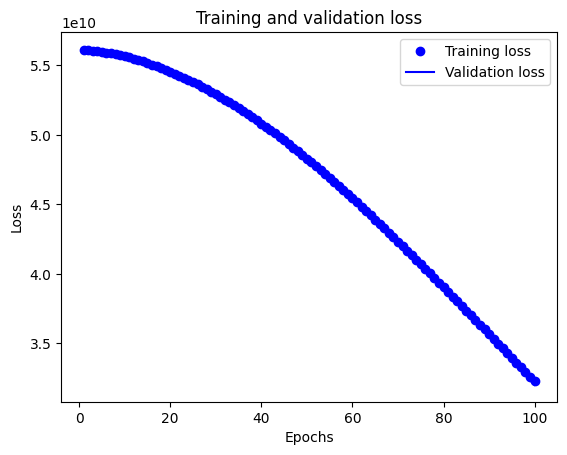

In [ ]:
# https://github.com/fchollet/deep-learning-with-python-notebooks/

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

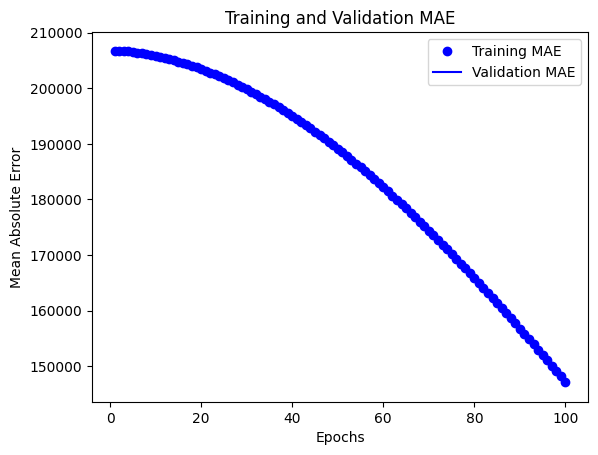

In [ ]:
# https://github.com/fchollet/deep-learning-with-python-notebooks/

# plt.clf()
# acc = history_dict["accuracy"]
# val_acc = history_dict["val_accuracy"]
# plt.plot(epochs, acc, "bo", label="Training acc")
# plt.plot(epochs, val_acc, "b", label="Validation acc")
# plt.title("Training and validation accuracy")
# plt.xlabel("Epochs")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.show()

# or mae
plt.clf()
mae = history_dict["mae"]
val_mae = history_dict["val_mae"]
plt.plot(epochs, mae, "bo", label="Training MAE")
plt.plot(epochs, val_mae, "b", label="Validation MAE")
plt.title("Training and Validation MAE")
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")
plt.legend()
plt.show()

## Evaluate the model

Do you think there's overfitting?


model.evaluate is a very handy function to calculate the performance of your model on any dataset.

Let's try it on the validation dataset and see if the numbers match the Keras output from above.

In [ ]:
model.evaluate(val_X, val_y)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32493051904.0000 - mae: 147580.4062


[32007038976.0, 146650.03125]

In [ ]:
print(model.predict(val_X[:10]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
[[ 48149.973]
 [ 41792.676]
 [ 46143.598]
 [107329.5  ]
 [ 83456.5  ]
 [ 37997.723]
 [ 85559.03 ]
 [ 62949.863]
 [ 68833.3  ]
 [ 62943.05 ]]


In [ ]:
print(model.predict(val_X[:10]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[ 48149.973]
 [ 41792.676]
 [ 46143.598]
 [107329.5  ]
 [ 83456.5  ]
 [ 37997.723]
 [ 85559.03 ]
 [ 62949.863]
 [ 68833.3  ]
 [ 62943.05 ]]


Part II

Take the Keras model you defined in Part I and add another hidden layer of 16 neurons. Then repeat the steps from Part I.

In [ ]:
# use knowledge in class. input part

# define the input layer
input = keras.layers.Input(shape=train_X.shape[1:])

# feed the input vector to the hidden layer
# optional: you can give names to each layer to help
# keep track. This doesn't affect the training etc.

h = keras.layers.Dense(16, activation="relu", name="Hidden")(input)

## add another hidden layer of 16 neurons here
h2 = keras.layers.Dense(16, activation="relu", name="Hidden2")(h)

# feed the output of the hidden layer to the output layer
output = keras.layers.Dense(1)(h2)

# tell Keras that this (input,output) pair is your model
model = keras.Model(input, output)


In [ ]:
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden (Dense)                       │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden2 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 433 (1.69 KB)

 Trainable params: 433 (1.69 KB)

 Non-trainable params: 0 (0.00 B)

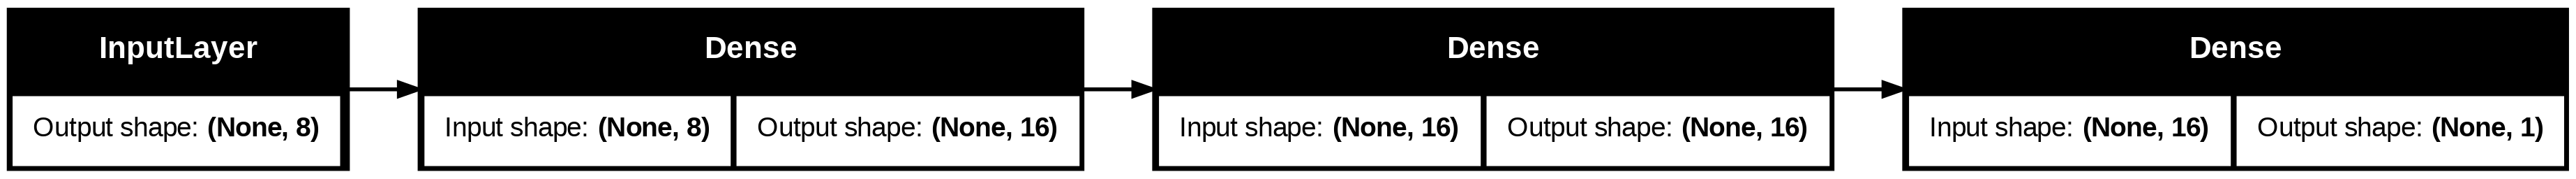

In [ ]:
keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [ ]:
model.compile(optimizer="adam",
              loss="mse",
              metrics=["mae"])
# or metrics=["acc"]

In [ ]:
history = model.fit(train_X,              # the array with the input X columns
                    train_y,              # the array with the output y column
                    epochs=100,           # number of epochs to run
                    batch_size=32,        # number of samples (ie data points) per batch
                    verbose=1,            # verbosity during training
                    validation_data=(val_X, val_y)) # validation data

Epoch 1/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 55382634496.0000 - mae: 205319.5938 - val_loss: 56027201536.0000 - val_mae: 206737.4688
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 55719804928.0000 - mae: 206356.0156 - val_loss: 54981054464.0000 - val_mae: 204391.7500
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 54328410112.0000 - mae: 203122.0781 - val_loss: 52514603008.0000 - val_mae: 198800.7031
Epoch 4/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 51716927488.0000 - mae: 196860.4531 - val_loss: 48562368512.0000 - val_mae: 189514.1406
Epoch 5/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 47220056064.0000 - mae: 186063.0156 - val_loss: 43340578816.0000 - val_mae: 176495.7812
Epoch 6/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 41897750528.0000 - mae: 172789.1094 - val_loss: 37333434368.0000 - val_mae: 160408.0000
Epoch 7/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 35199729664.0000 - mae: 154532.8906 - val_los

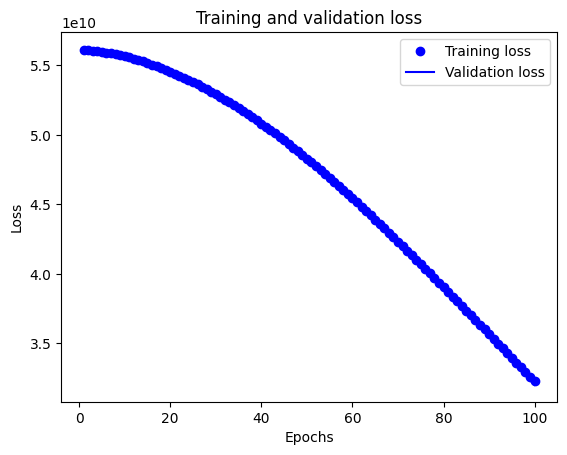

In [ ]:
# https://github.com/fchollet/deep-learning-with-python-notebooks/

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

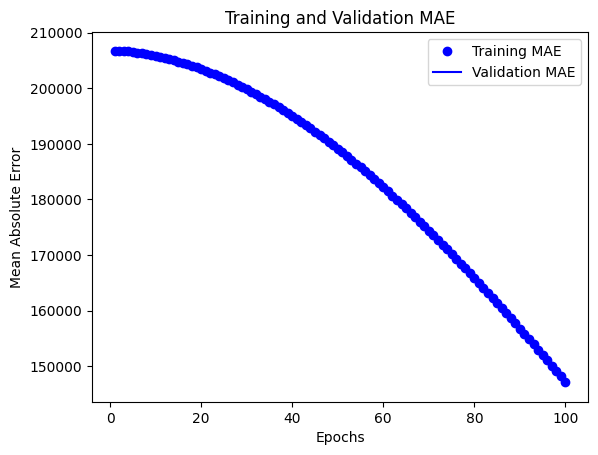

In [ ]:
# https://github.com/fchollet/deep-learning-with-python-notebooks/

# plt.clf()
# acc = history_dict["accuracy"]
# val_acc = history_dict["val_accuracy"]
# plt.plot(epochs, acc, "bo", label="Training acc")
# plt.plot(epochs, val_acc, "b", label="Validation acc")
# plt.title("Training and validation accuracy")
# plt.xlabel("Epochs")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.show()

# or mae
plt.clf()
mae = history_dict["mae"]
val_mae = history_dict["val_mae"]
plt.plot(epochs, mae, "bo", label="Training MAE")
plt.plot(epochs, val_mae, "b", label="Validation MAE")
plt.title("Training and Validation MAE")
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")
plt.legend()
plt.show()

In [ ]:
model.evaluate(val_X, val_y)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4902288384.0000 - mae: 50851.1094


[4637634560.0, 49260.3671875]

In [ ]:
print(model.predict(val_X[:10]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
[[227433.3 ]
 [286249.78]
 [183965.38]
 [316910.56]
 [232526.25]
 [ 98614.46]
 [290574.84]
 [258971.25]
 [255186.05]
 [180242.19]]


In [ ]:
print(model.predict(val_X[:10]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[227433.3 ]
 [286249.78]
 [183965.38]
 [316910.56]
 [232526.25]
 [ 98614.46]
 [290574.84]
 [258971.25]
 [255186.05]
 [180242.19]]


Part III

Take the Keras model you defined in Part I. Modify it so that the input layer is ALSO connected (directly) to the output layer i.e., the output layer should be connected to the input layer and the hidden layer. Then repeat the steps from Part I.

In [ ]:
# define the input layer
input = keras.layers.Input(shape=train_X.shape[1:])

# feed the input vector to the hidden layer
# optional: you can give names to each layer to help
# keep track. This doesn't affect the training etc.

h = keras.layers.Dense(16, activation="relu", name="Hidden")(input)

concatenated = keras.layers.Concatenate()([h, input])

# feed the output of the hidden layer to the output layer
output = keras.layers.Dense(1, name="Output")(concatenated)

# tell Keras that this (input,output) pair is your model
model = keras.Model(input, output)

In [ ]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9             │ (None, 8)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Hidden (Dense)            │ (None, 16)             │            144 │ input_layer_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 24)             │              0 │ Hidden[0][0],          │
│                           │                        │                │ input_layer_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Output (Dense)            │ (None, 1)              │             25 │ concatenate[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 169 (676.00 B)

 Trainable params: 169 (676.00 B)

 Non-trainable params: 0 (0.00 B)

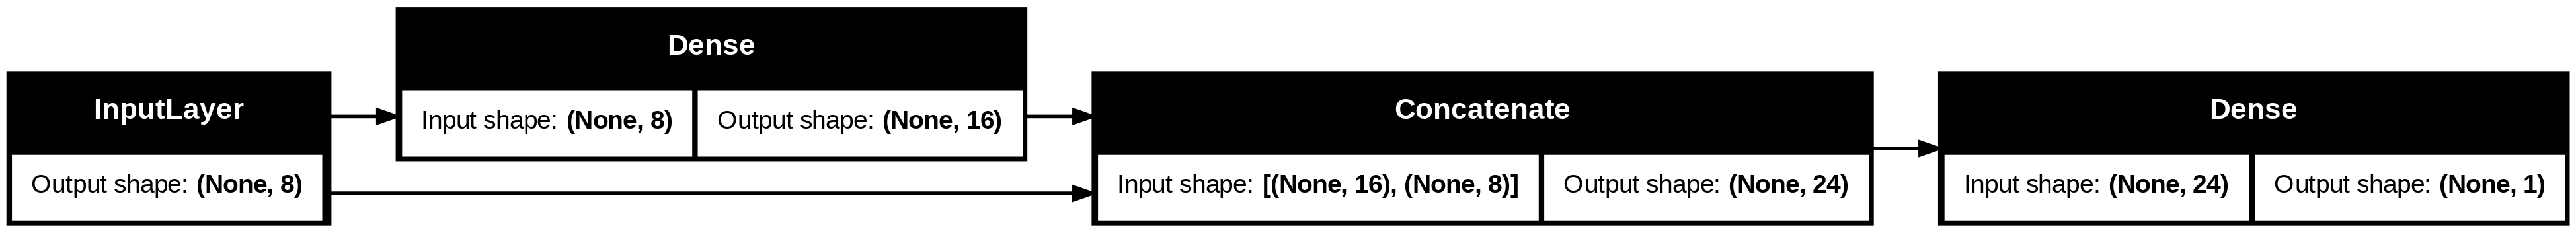

In [ ]:
keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [ ]:
model.compile(optimizer="adam",
              loss="mse",
              metrics=["mae"])
# or metrics=["acc"]

In [ ]:
history = model.fit(train_X,              # the array with the input X columns
                    train_y,              # the array with the output y column
                    epochs=100,           # number of epochs to run
                    batch_size=32,        # number of samples (ie data points) per batch
                    verbose=1,            # verbosity during training
                    validation_data=(val_X, val_y)) # validation data

Epoch 1/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 57089777664.0000 - mae: 208967.7812 - val_loss: 56176218112.0000 - val_mae: 207080.4688
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 56021118976.0000 - mae: 206568.0312 - val_loss: 56159748096.0000 - val_mae: 207044.5469
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 55258050560.0000 - mae: 205540.6562 - val_loss: 56133545984.0000 - val_mae: 206987.8281
Epoch 4/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 55890862080.0000 - mae: 206313.6562 - val_loss: 56096931840.0000 - val_mae: 206908.6562
Epoch 5/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 56301277184.0000 - mae: 207312.6719 - val_loss: 56052617216.0000 - val_mae: 206813.0000
Epoch 6/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 56464429056.0000 - mae: 207229.8906 - val_loss: 56001404928.0000 - val_mae: 206702.2812
Epoch 7/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 55571443712.0000 - mae: 206032.7188 - val_los

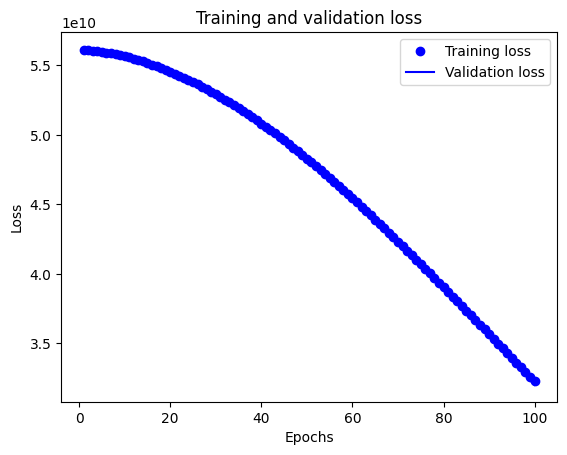

In [ ]:
# https://github.com/fchollet/deep-learning-with-python-notebooks/

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

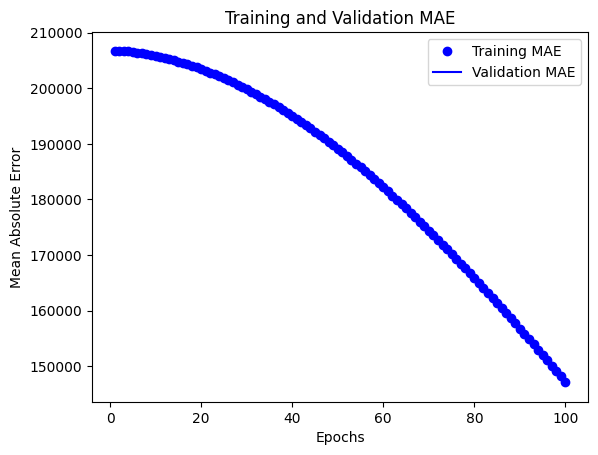

In [ ]:
# https://github.com/fchollet/deep-learning-with-python-notebooks/

# plt.clf()
# acc = history_dict["accuracy"]
# val_acc = history_dict["val_accuracy"]
# plt.plot(epochs, acc, "bo", label="Training acc")
# plt.plot(epochs, val_acc, "b", label="Validation acc")
# plt.title("Training and validation accuracy")
# plt.xlabel("Epochs")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.show()

# or mae
plt.clf()
mae = history_dict["mae"]
val_mae = history_dict["val_mae"]
plt.plot(epochs, mae, "bo", label="Training MAE")
plt.plot(epochs, val_mae, "b", label="Validation MAE")
plt.title("Training and Validation MAE")
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")
plt.legend()
plt.show()

In [ ]:
model.evaluate(val_X, val_y)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 33273468928.0000 - mae: 149457.9844


[32829640704.0, 148526.546875]

In [ ]:
print(model.predict(val_X[:10]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
[[52216.777]
 [34710.96 ]
 [47411.39 ]
 [85004.6  ]
 [90388.375]
 [25982.436]
 [96632.305]
 [63238.543]
 [70941.66 ]
 [51363.137]]


In [ ]:
print(model.predict(val_X[:10]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[52216.777]
 [34710.96 ]
 [47411.39 ]
 [85004.6  ]
 [90388.375]
 [25982.436]
 [96632.305]
 [63238.543]
 [70941.66 ]
 [51363.137]]


Part IV

Using Keras Tuner, do hyperparameter optimization across:

the number of layers: [1,2,3]
the number of units in each layer: [4, 8]
(i.e., 6 hyper-parameter combinations)

We will use a Python package called **[Keras Tuner](https://keras.io/keras_tuner/)** to do hyperparameter optimization.

In [ ]:
!pip install keras-tuner -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.4 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt

## Optimizing multiple hyperparameters

In the example above, we searched for the best value for one hyperparameter: the number of units in the single hidden layer.

What if we want to optimize across multiple hyperparameters?

the number of layers
the number of units in each layer
the learning rate used by Adam
the activation function
No problem. This is all easily doable using Keras Tuner.

I have provided a new build_model function below that varies all of these things. Read through it carefully. I have only used hp.Choice and hp.Int below but there are many others we can use.

In [ ]:
def build_model(hp):

  input = keras.layers.Input(shape=train_X.shape[1:])

  x = input

  # Vary the number of layers
  for i in range(hp.Int("num_layers", 1, 2, 3)):
      x = keras.layers.Dense(
          # Vary the number of units
          units=hp.Choice(f"units", [4, 8]),
          # Vary the activation function
          activation=hp.Choice("activation", ["relu", "sigmoid"]),
      )(x)

  output = keras.layers.Dense(1, activation="sigmoid")(x)

  model = keras.Model(input,output)

  # Vary the learning rate
  learning_rate = hp.Choice("lr", [1e-4, 1e-3, 1e-2])

  model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
      loss="mse",
      metrics=["mae"],
#     metrics=["mae"],
  )

  return model

  # may not need to vary activation function or learning rate

Below, I just repeat the steps we did for the single-hyperparameter case.

In [ ]:
tuner = kt.GridSearch(
    build_model,
    objective="val_mae",
    overwrite=True
)

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 2, 'step': 3, 'sampling': 'linear'}
units (Choice)
{'default': 4, 'conditions': [], 'values': [4, 8], 'ordered': True}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid'], 'ordered': False}
lr (Choice)
{'default': 0.0001, 'conditions': [], 'values': [0.0001, 0.001, 0.01], 'ordered': True}


In [ ]:
tuner.search(train_X,
             train_y,
             epochs=100,
             batch_size=32,
             verbose=1,
             validation_data=(val_X, val_y))

Trial 12 Complete [00h 02m 08s]
val_mae: 207092.359375

Best val_mae So Far: 207092.359375
Total elapsed time: 00h 25m 37s


In [ ]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_mae", direction="min")

Trial 0000 summary
Hyperparameters:
num_layers: 1
units: 4
activation: relu
lr: 0.0001
Score: 207092.359375

Trial 0001 summary
Hyperparameters:
num_layers: 1
units: 4
activation: relu
lr: 0.001
Score: 207092.359375

Trial 0002 summary
Hyperparameters:
num_layers: 1
units: 4
activation: relu
lr: 0.01
Score: 207092.359375

Trial 0003 summary
Hyperparameters:
num_layers: 1
units: 4
activation: sigmoid
lr: 0.0001
Score: 207092.359375

Trial 0004 summary
Hyperparameters:
num_layers: 1
units: 4
activation: sigmoid
lr: 0.001
Score: 207092.359375

Trial 0005 summary
Hyperparameters:
num_layers: 1
units: 4
activation: sigmoid
lr: 0.01
Score: 207092.359375

Trial 0006 summary
Hyperparameters:
num_layers: 1
units: 8
activation: relu
lr: 0.0001
Score: 207092.359375

Trial 0007 summary
Hyperparameters:
num_layers: 1
units: 8
activation: relu
lr: 0.001
Score: 207092.359375

Trial 0008 su

Maybe need to do this next bit for this, maybe not

In [ ]:
best_model = tuner.get_best_models(1)[0]

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
best_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

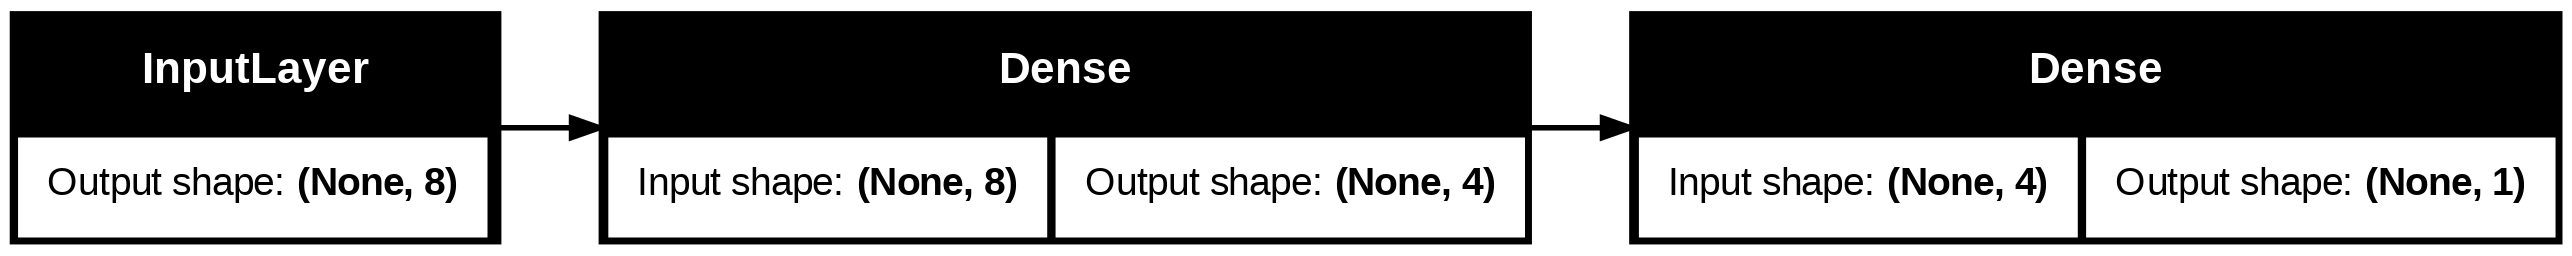

In [ ]:
keras.utils.plot_model(best_model, show_shapes=True, rankdir="LR")

In [ ]:
best_model.evaluate(val_X, val_y)

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 56802258944.0000 - mae: 208740.7031


[56181575680.0, 207092.359375]

In [ ]:
print(best_model.predict(val_X[:10]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
[[0.9869366 ]
 [0.9815409 ]
 [0.9758124 ]
 [0.9997899 ]
 [0.99793375]
 [0.809565  ]
 [0.9994543 ]
 [0.97889704]
 [0.99096596]
 [0.99772805]]


Answer these questions in text cells:

What is the optimal hyper-parameter combination?

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

 Input layer: 8. Param: 0
 Hidden layer 1: 4. Param: 36
 Output: 1. Param: 5


What is the MSE of the optimal model?
2ms/step - loss (MSE): 56802258944.0000 - mae: 208740.7031
[56181575680.0, 207092.359375]

How does this optimal model compare to the models found in Parts I, II and III?

Part 1 2ms/step loss: 32493051904.0000 - mae: 147580.4062
[32007038976.0, 146650.03125]

Part 2 2ms/step - loss: 4902288384.0000 - mae: 50851.1094
[4637634560.0, 49260.3671875]

Part 3 2ms/step - loss: 33273468928.0000 - mae: 149457.9844
[32829640704.0, 148526.546875]

The loss in part 1 performed the best in terms of MSE (loss). Part 1 also has the lowest MAE. Thus, Part 1 model is the best
